# OBTENER EL DATASET

In [49]:
from datetime import date, timedelta
import pandas as pd
from binance import Client

# Obtener la fecha de hoy y de ayer
today = date.today()
yesterday = today - timedelta(days=1)

def criptodata(dataticker):
    # Claves de la API de Binance
    api_key = "91f7175f-e6fa-4099-8626-20a408f818ab"
    api_secret = "tu contraseña secreta de key entre comillas"
    # Se saca en: https://testnet.binance.vision/
    client = Client(api_key, api_secret)
    
    # Obtener el precio actual del símbolo
    price = client.get_symbol_ticker(symbol=dataticker)
    print(price)
    
    # Configurar los parámetros para obtener datos históricos
    asset = dataticker
    start = "2024.09.01"
    end = str(yesterday)
    timeframe = "1d"
    
    # Obtener datos históricos
    klines = client.get_historical_klines(asset, timeframe, start, end)
    
    # Verificar si hay datos antes de procesar
    if len(klines) > 0:
        df = pd.DataFrame(klines)
        df = df.iloc[:, :6]
        df.columns = ["Date", "Open", "High", "Low", "Close", "Volume"]
        df = df.set_index("Date")
        df.index = pd.to_datetime(df.index, unit="ms")
        df = df.astype("float")
        print(df)
        
        # Guardar los datos en un archivo CSV
        df.to_csv(dataticker + ".csv", encoding='utf-8')
        print(f"Data extraction finished for {dataticker} :)")
    else:
        print(f"No data found for {dataticker} in the given date range.")

# Inicializar el cliente de Binance
api_key = "91f7175f-e6fa-4099-8626-20a408f818ab"
api_secret = "tu contraseña secreta de key entre comillas"
client = Client(api_key, api_secret)

# Obtener la lista de todos los símbolos de trading
exchange_info = client.get_exchange_info()

# Filtrar los tickers que terminan en 'USDT'
tickers = [s['symbol'] for s in exchange_info['symbols'] if s['symbol'].endswith('USDT')]

# Iterar sobre los tickers y obtener los datos
for ticker in tickers:
    criptodata(ticker)


{'symbol': 'BTCUSDT', 'price': '62182.01000000'}
                Open      High       Low     Close       Volume
Date                                                           
2024-09-01  58974.00  59076.59  57201.00  57301.86  20705.15741
2024-09-02  57301.77  59425.69  57128.00  59132.13  22895.01461
2024-09-03  59132.12  59809.65  57415.00  57487.73  22828.18447
2024-09-04  57487.74  58519.00  55606.00  57970.90  35560.82146
2024-09-05  57970.90  58327.07  55643.65  56180.00  27806.91413
2024-09-06  56180.00  57008.00  52550.00  53962.97  54447.76826
2024-09-07  53962.97  54850.00  53745.54  54160.86  16694.04774
2024-09-08  54160.86  55318.00  53629.01  54869.95  16274.14779
2024-09-09  54869.95  58088.00  54591.96  57042.00  32384.51737
2024-09-10  57042.01  58044.36  56386.40  57635.99  23626.78126
2024-09-11  57635.99  57981.71  55545.19  57338.00  33026.56757
2024-09-12  57338.00  58588.00  57324.00  58132.32  31074.40631
2024-09-13  58132.31  60625.00  57632.62  60498.00  298

In [89]:
import os
import pandas as pd

carpeta_csv = r'C:\Users\magic\Desktop\1'

dfs = []

# Iterar sobre los archivos de la carpeta
for archivo in os.listdir(carpeta_csv):
    if archivo.endswith(".csv"):
        # Leer el archivo CSV
        df = pd.read_csv(os.path.join(carpeta_csv, archivo))
        
        # Asegurarse de que las columnas sean las esperadas
        df = df[['Date', 'Open', 'High', 'Low', 'Close', 'Volume']]
        
        # Agregar el nombre del archivo como primera columna
        df.insert(0, 'name', archivo)  # Inserta 'nombre_archivo' en la posición 0
        
        # Agregar el DataFrame a la lista
        dfs.append(df)

# Combinar todos los DataFrames
df_combined = pd.concat(dfs, ignore_index=True)

# Guardar el archivo combinado
df_combined.to_csv('New_data.csv', index=False)

print("Todos los CSV han sido combinados en 'New_data.csv'.")

Todos los CSV han sido combinados en 'New_data.csv'.


# PREPROCESAMINENTO DEL DATASET



In [77]:
#carga del dataset y muestreo de las primeras filas
import pandas as pd
df=pd.read_csv('New_data.csv')
print(df.head())

            name        Date    Open    High     Low   Close       Volume
0  1INCHUSDT.csv  2024-09-01  0.2388  0.2399  0.2220  0.2252    6420143.9
1  1INCHUSDT.csv  2024-09-02  0.2252  0.2371  0.2230  0.2347    6984714.1
2  1INCHUSDT.csv  2024-09-03  0.2347  0.2382  0.2220  0.2225    5980786.8
3  1INCHUSDT.csv  2024-09-04  0.2225  0.2919  0.2106  0.2772  135712830.5
4  1INCHUSDT.csv  2024-09-05  0.2773  0.2834  0.2509  0.2547   52798370.3


In [78]:
#informacion general del dataset
print(df.info())
#estadisticas descriptivas
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7118 entries, 0 to 7117
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    7118 non-null   object 
 1   Date    7118 non-null   object 
 2   Open    7118 non-null   float64
 3   High    7118 non-null   float64
 4   Low     7118 non-null   float64
 5   Close   7118 non-null   float64
 6   Volume  7118 non-null   float64
dtypes: float64(5), object(2)
memory usage: 389.4+ KB
None
               Open          High           Low         Close        Volume
count   7118.000000   7118.000000   7118.000000   7118.000000  7.118000e+03
mean     180.345643    183.881356    176.496115    180.670443  4.956865e+10
std     2914.113321   2971.759527   2853.572208   2922.097538  8.876279e+11
min        0.000007      0.000007      0.000006      0.000007  1.127793e+02
25%        0.058550      0.060597      0.056510      0.058975  9.346765e+05
50%        0.343100      0.354400      0.33320

In [79]:
#verificar si tenemos datos nulos o vacios
print(df.isnull().sum())

name      0
Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


# Manejo de valores atipicos

In [80]:
import numpy as np
# manejo de valores atipicos
def normalizar_ouliners(column):
  Q1 = column.quantile(0.25)
  Q3 = column.quantile(0.75)
  RIC = Q3 - Q1

  lower_bound = Q1 - 1.5 * RIC
  upper_bound = Q3 + 1.5 * RIC

  # Winsorización (ajustar outliers a los límites)
  column = np.where(column < lower_bound, lower_bound, column)
  column = np.where(column > upper_bound, upper_bound, column)

  return column

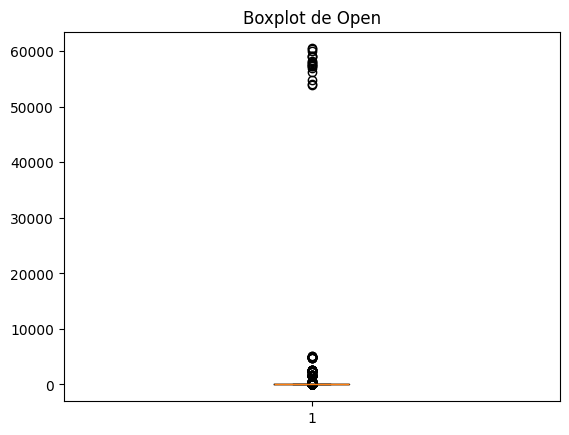

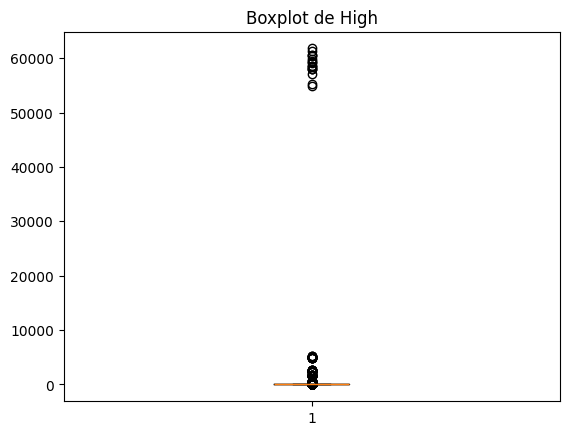

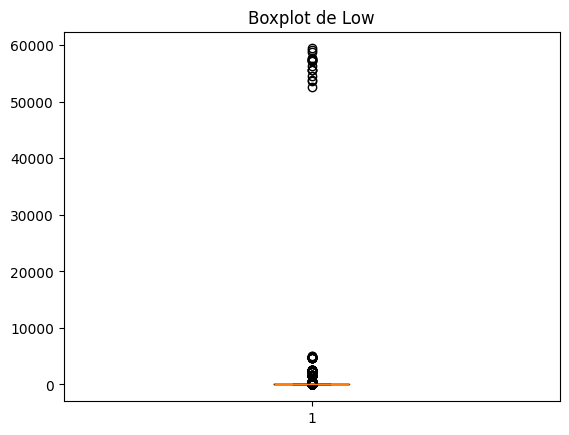

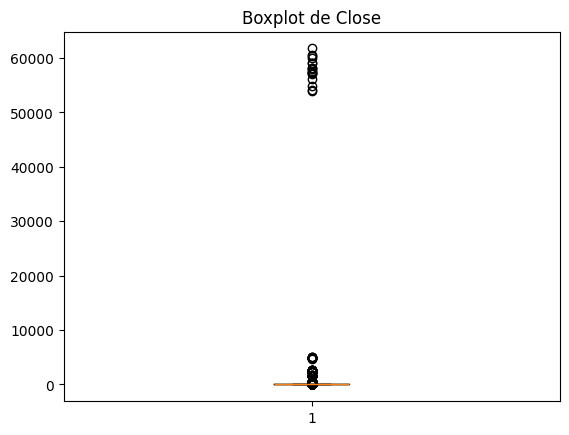

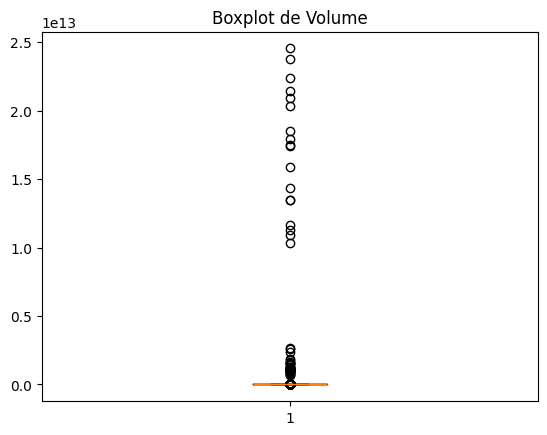

In [81]:
#Bloxplots para visualizar datos atipicos

numeric_variables = df.select_dtypes(include=["int64", "float64"])
for col in numeric_variables:
    plt.figure()
    plt.boxplot(df[col])
    plt.title(f"Boxplot de {col}")
    plt.show()


In [82]:
#normalizar outliners
for col in ['Open','High','Low','Close','Volume']:
    df[col] = normalizar_ouliners(df[col])

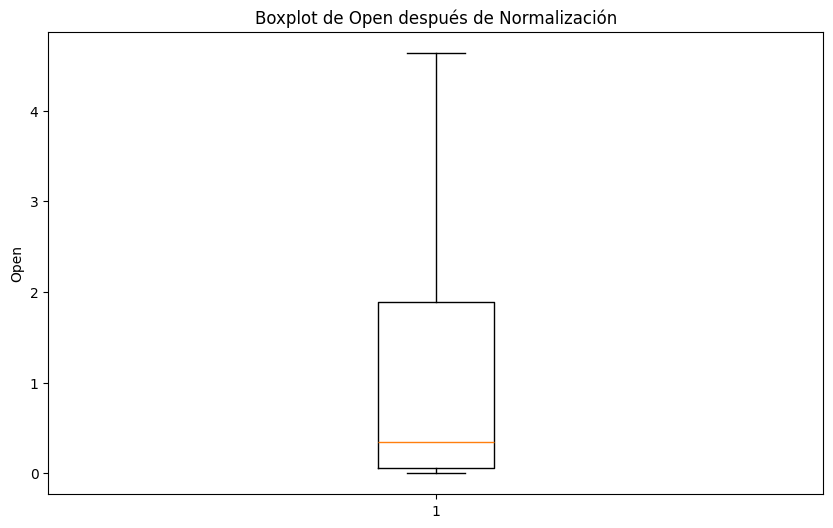

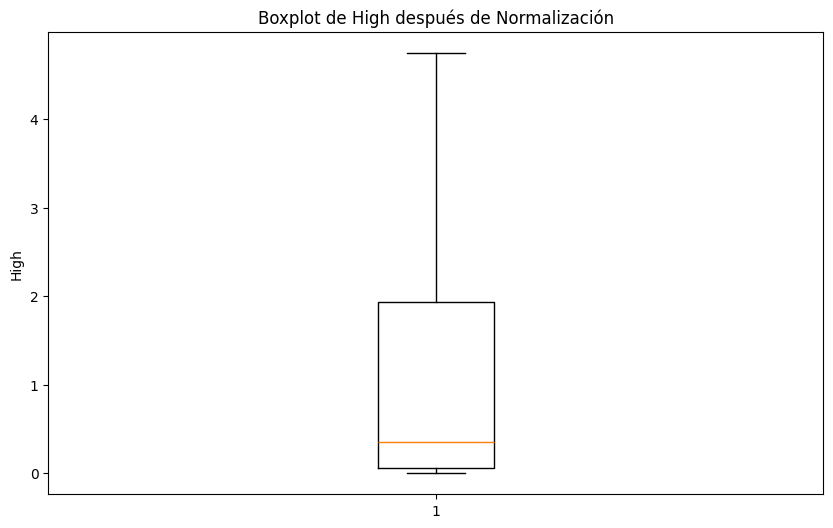

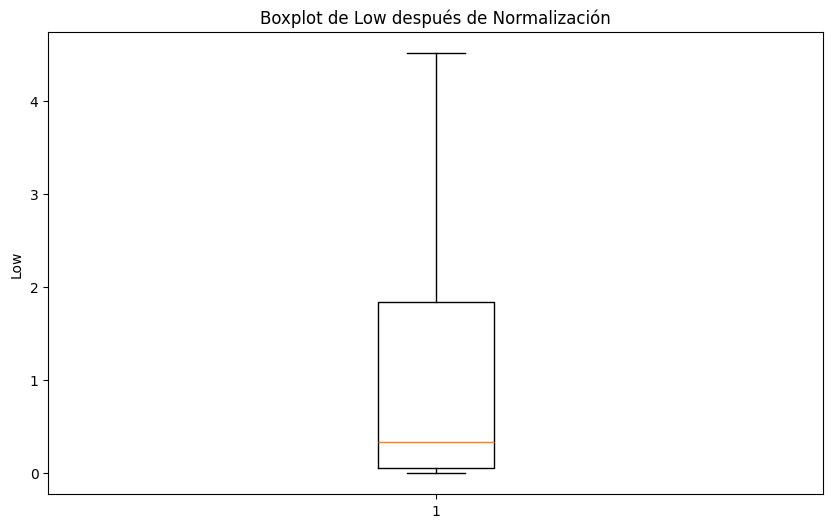

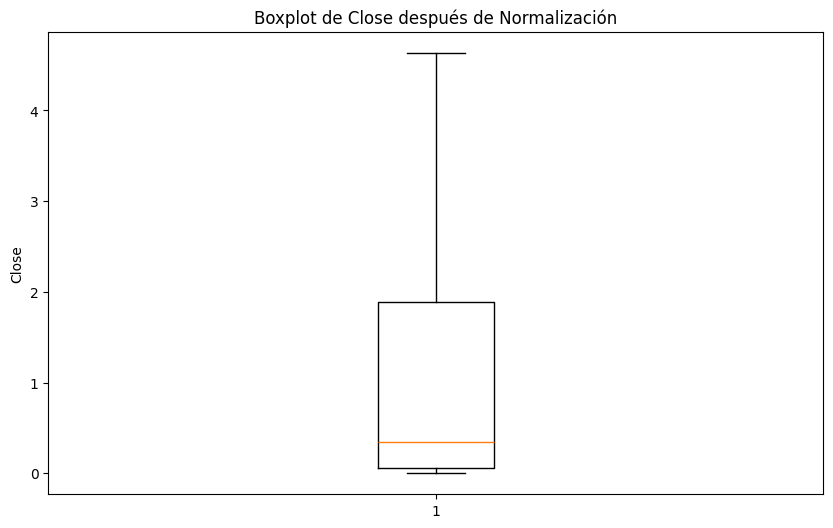

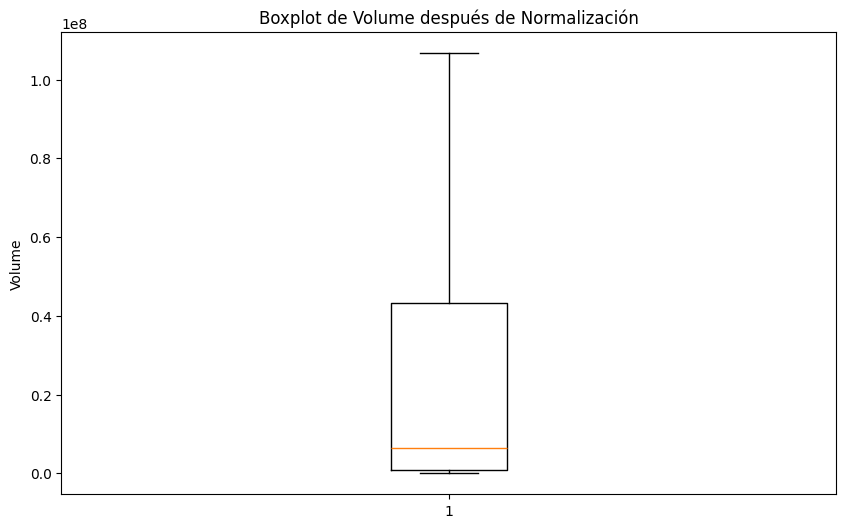

In [83]:
#visualizar los datos normalizados
for col in ['Open','High','Low','Close','Volume']:
    plt.figure(figsize=(10, 6))
    plt.boxplot(df[col])
    plt.title(f'Boxplot de {col} después de Normalización')
    plt.ylabel(col)
    plt.show()

In [92]:
df.to_csv('New_data.csv', index=False)
print("Dataset normalizado guardado como 'New_data.csv'.")

Dataset normalizado guardado como 'New_data.csv'.


# Grafos
- empezamos con la creacion del grafo con el nuevo dataset ya normalizado

In [93]:
csv_file = 'New_data.csv'
dfnor = pd.read_csv(csv_file)

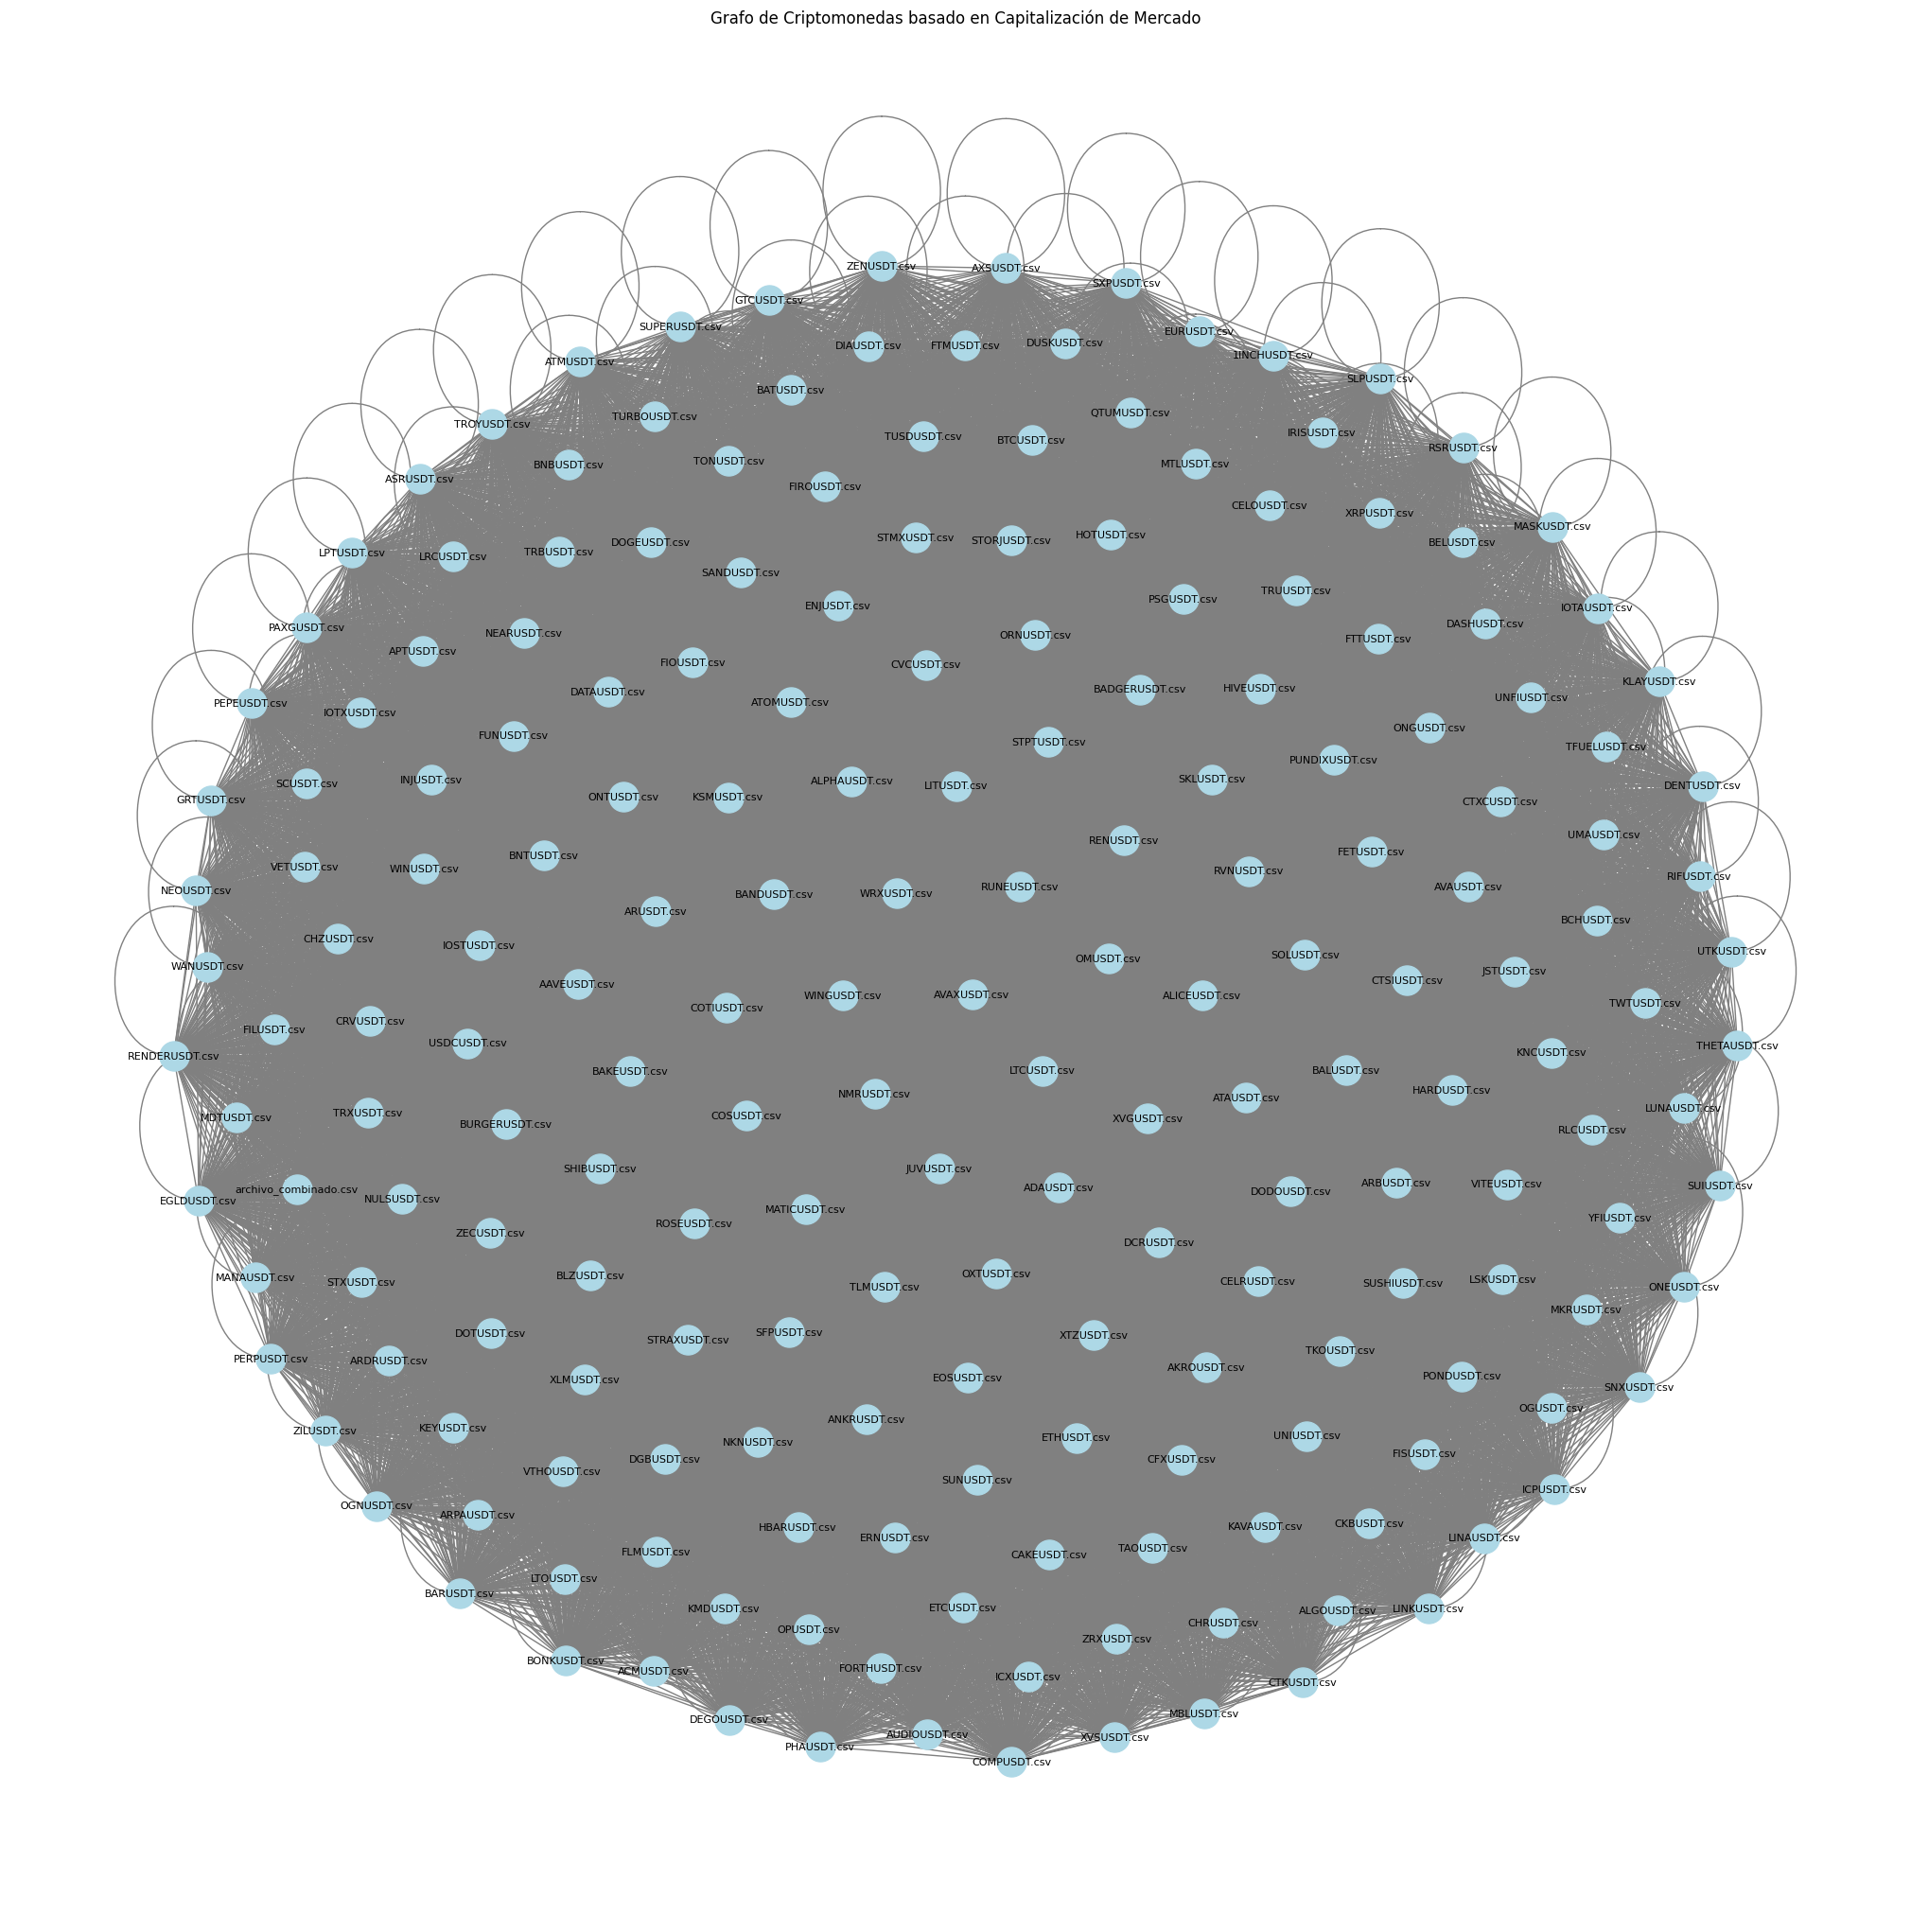

In [97]:
import networkx as nx

G = nx.Graph()

#agrega nodos
for index, row in dfnor.iterrows():
    crypto_name = row['name']
    G.add_node(crypto_name, open=row['Open'], high=row['High'], low=row['Low'],close=row['Close'], volumen=row['Volume'])

#agregar aristas (relaciones basadas en similitud en la capitalización de mercado)
for i, row_i in dfnor.iterrows():
    for j, row_j in dfnor.iterrows():
        if i != j:
            #relaciona criptomonedas si su capitalización de mercado está dentro de un rango similar
            if abs(row_i['High'] - row_j['High']) < 1e10:  #rango de 10 mil millones de USD
                G.add_edge(row_i['name'], row_j['name'])

plt.figure(figsize=(20, 20))
pos = nx.spring_layout(G, k=0.90, iterations=100)
nx.draw(G, pos, with_labels=True, node_size=500, font_size=8, node_color='lightblue', edge_color='gray')
plt.title('Grafo de Criptomonedas basado en Capitalización de Mercado')
plt.show()